In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [3]:
df.isna().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
df['Rent'].describe()

count    4.746000e+03
mean     3.499345e+04
std      7.810641e+04
min      1.200000e+03
25%      1.000000e+04
50%      1.600000e+04
75%      3.300000e+04
max      3.500000e+06
Name: Rent, dtype: float64

In [8]:
df[['Current Floor', 'Total Floors']] = df['Floor'].str.split(' out of ', expand=True)
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [9]:
df['Current Floor'].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [10]:
ground_count = df[df['Current Floor'] == 'Ground'].shape[0]
upper_basement_count = df[df['Current Floor'] == 'Upper Basement'].shape[0]
lower_basement_count = df[df['Current Floor'] == 'Lower Basement'].shape[0]

print("Number of rows with 'Ground':", ground_count)
print("Number of rows with 'Upper Basement':", upper_basement_count)
print("Number of rows with 'Lower Basement':", lower_basement_count)

Number of rows with 'Ground': 927
Number of rows with 'Upper Basement': 23
Number of rows with 'Lower Basement': 11


In [11]:
df['Current Floor'] = df['Current Floor'].replace('Ground', '0')
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2


In [12]:
df=df[~df['Current Floor'].isin(['Upper Basement', 'Lower Basement'])]
df.shape

(4712, 14)

In [13]:
df['Total Floors'].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '22', '58', '66',
       '48', '40', '44', '42', '41', '60', '32', '30', '29', '89', '15',
       '16', '11', '28', '17', '45', '35', '75', '38', '51', '43', '25',
       '27', '26', '76', '9', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34', None],
      dtype=object)

In [14]:
total_floors_null_count = df['Total Floors'].isnull().sum()
print("Number of cells with None values in 'Total Floors' column: ", total_floors_null_count)

Number of cells with None values in 'Total Floors' column:  4


In [15]:
df = df.dropna(subset=['Total Floors'])
df.shape

(4708, 14)

In [16]:
df['Current Floor'] = df['Current Floor'].astype(int)
df['Total Floors'] = df['Total Floors'].astype(int)

In [17]:
df['Floors']= df['Current Floor']/df['Total Floors']
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Floors,Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,0.000000
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.333333
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.333333
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,0.500000
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,0.500000


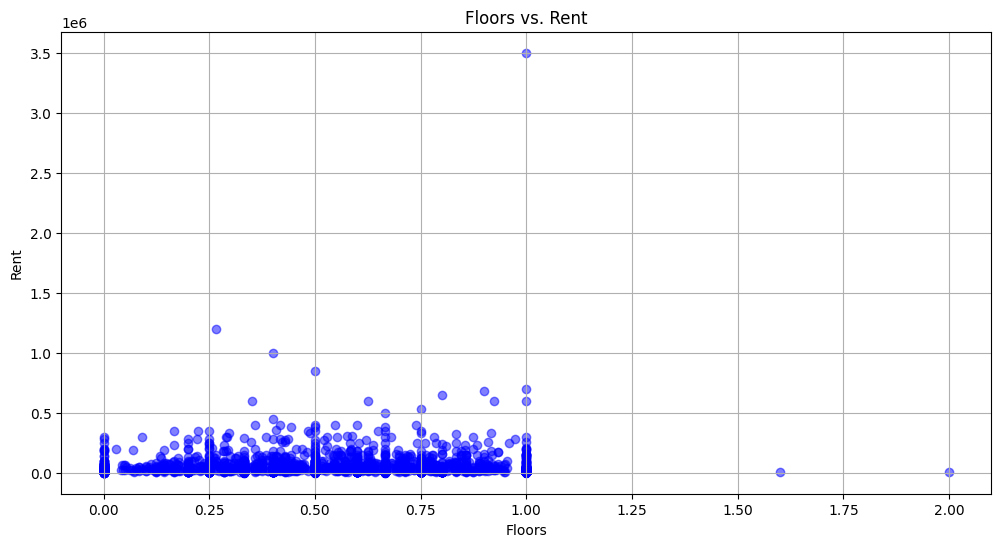

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(df['Floors'],df['Rent'], color='b', alpha=0.5)
plt.title('Floors vs. Rent')
plt.xlabel('Floors')
plt.ylabel('Rent')
plt.grid(True)
plt.show()

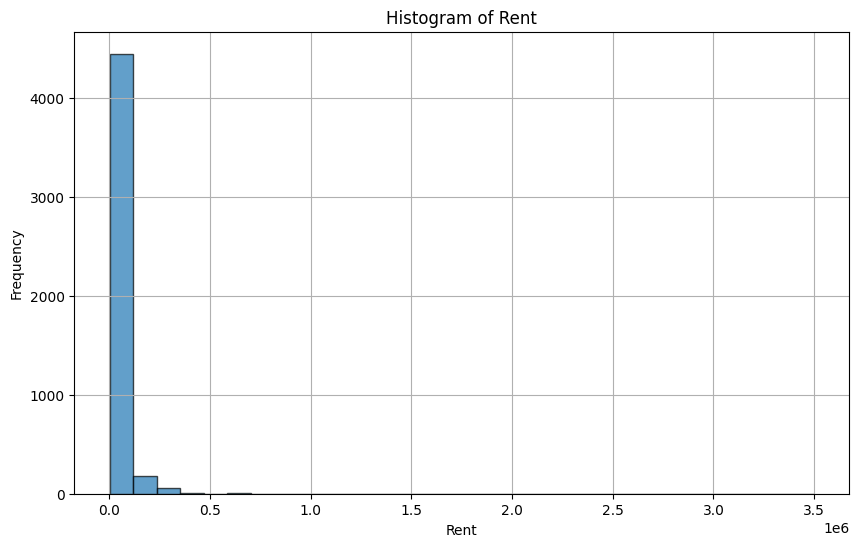

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df['Rent'], bins=30, edgecolor='k', alpha=0.7)
plt.title(f'Histogram of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [20]:
rows_greater_than_1 = df[df['Floors'] > 1.0].shape[0]

print("Number of rows where the percentage is greater than 1.0:", rows_greater_than_1)

Number of rows where the percentage is greater than 1.0: 2


In [21]:
df = df[df['Floors'] <= 1.0]
df.shape

(4706, 15)

In [22]:
print(np.where(df['Rent']>2000000))

(array([1817], dtype=int64),)


In [23]:
df.drop([1837], axis=0, inplace=True)

In [24]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Current Floor,Total Floors,Floors
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,0,2,0.000000
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.333333
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3,0.333333
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,1,2,0.500000
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner,1,2,0.500000


Test

In [25]:
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']

End Test

In [26]:
cat_cols=[feature for feature in df.columns if df[feature].dtype=='O']
le=LabelEncoder()
for cat_col in cat_cols:
    df[cat_col]=le.fit_transform(df[cat_col])

Feature Selection


In [27]:
X = df.drop(['Posted On', 'Rent','Floor','Current Floor','Total Floors'], axis=1)
y = df['Rent']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [29]:
# Train a RandomForest model
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Retrieve feature importances
importance = forest.feature_importances_

Feature: BHK, Score: 0.03228
Feature: Size, Score: 0.23141
Feature: Area Type, Score: 0.03335
Feature: Area Locality, Score: 0.27328
Feature: City, Score: 0.08945
Feature: Furnishing Status, Score: 0.06297
Feature: Tenant Preferred, Score: 0.05561
Feature: Bathroom, Score: 0.03247
Feature: Point of Contact, Score: 0.01579
Feature: Floors, Score: 0.17339


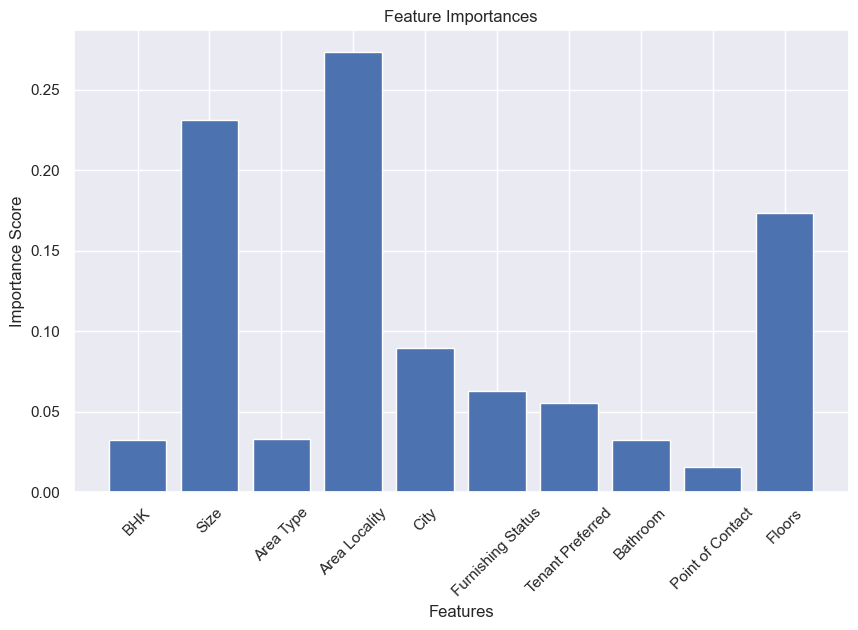

In [31]:
importance = forest.feature_importances_

# Get feature names from the DataFrame
feature_names = X.columns

# Print feature name and its importance score
for i, v in zip(feature_names, importance):
    print('Feature: %s, Score: %.5f' % (i, v))

# Set the Seaborn style for the plot
sns.set()

# Create a bar plot for the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importance)
plt.title("Feature Importances")
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()

In [32]:
df=df.drop(['Posted On','Floor','Current Floor','Total Floors'], axis=1)

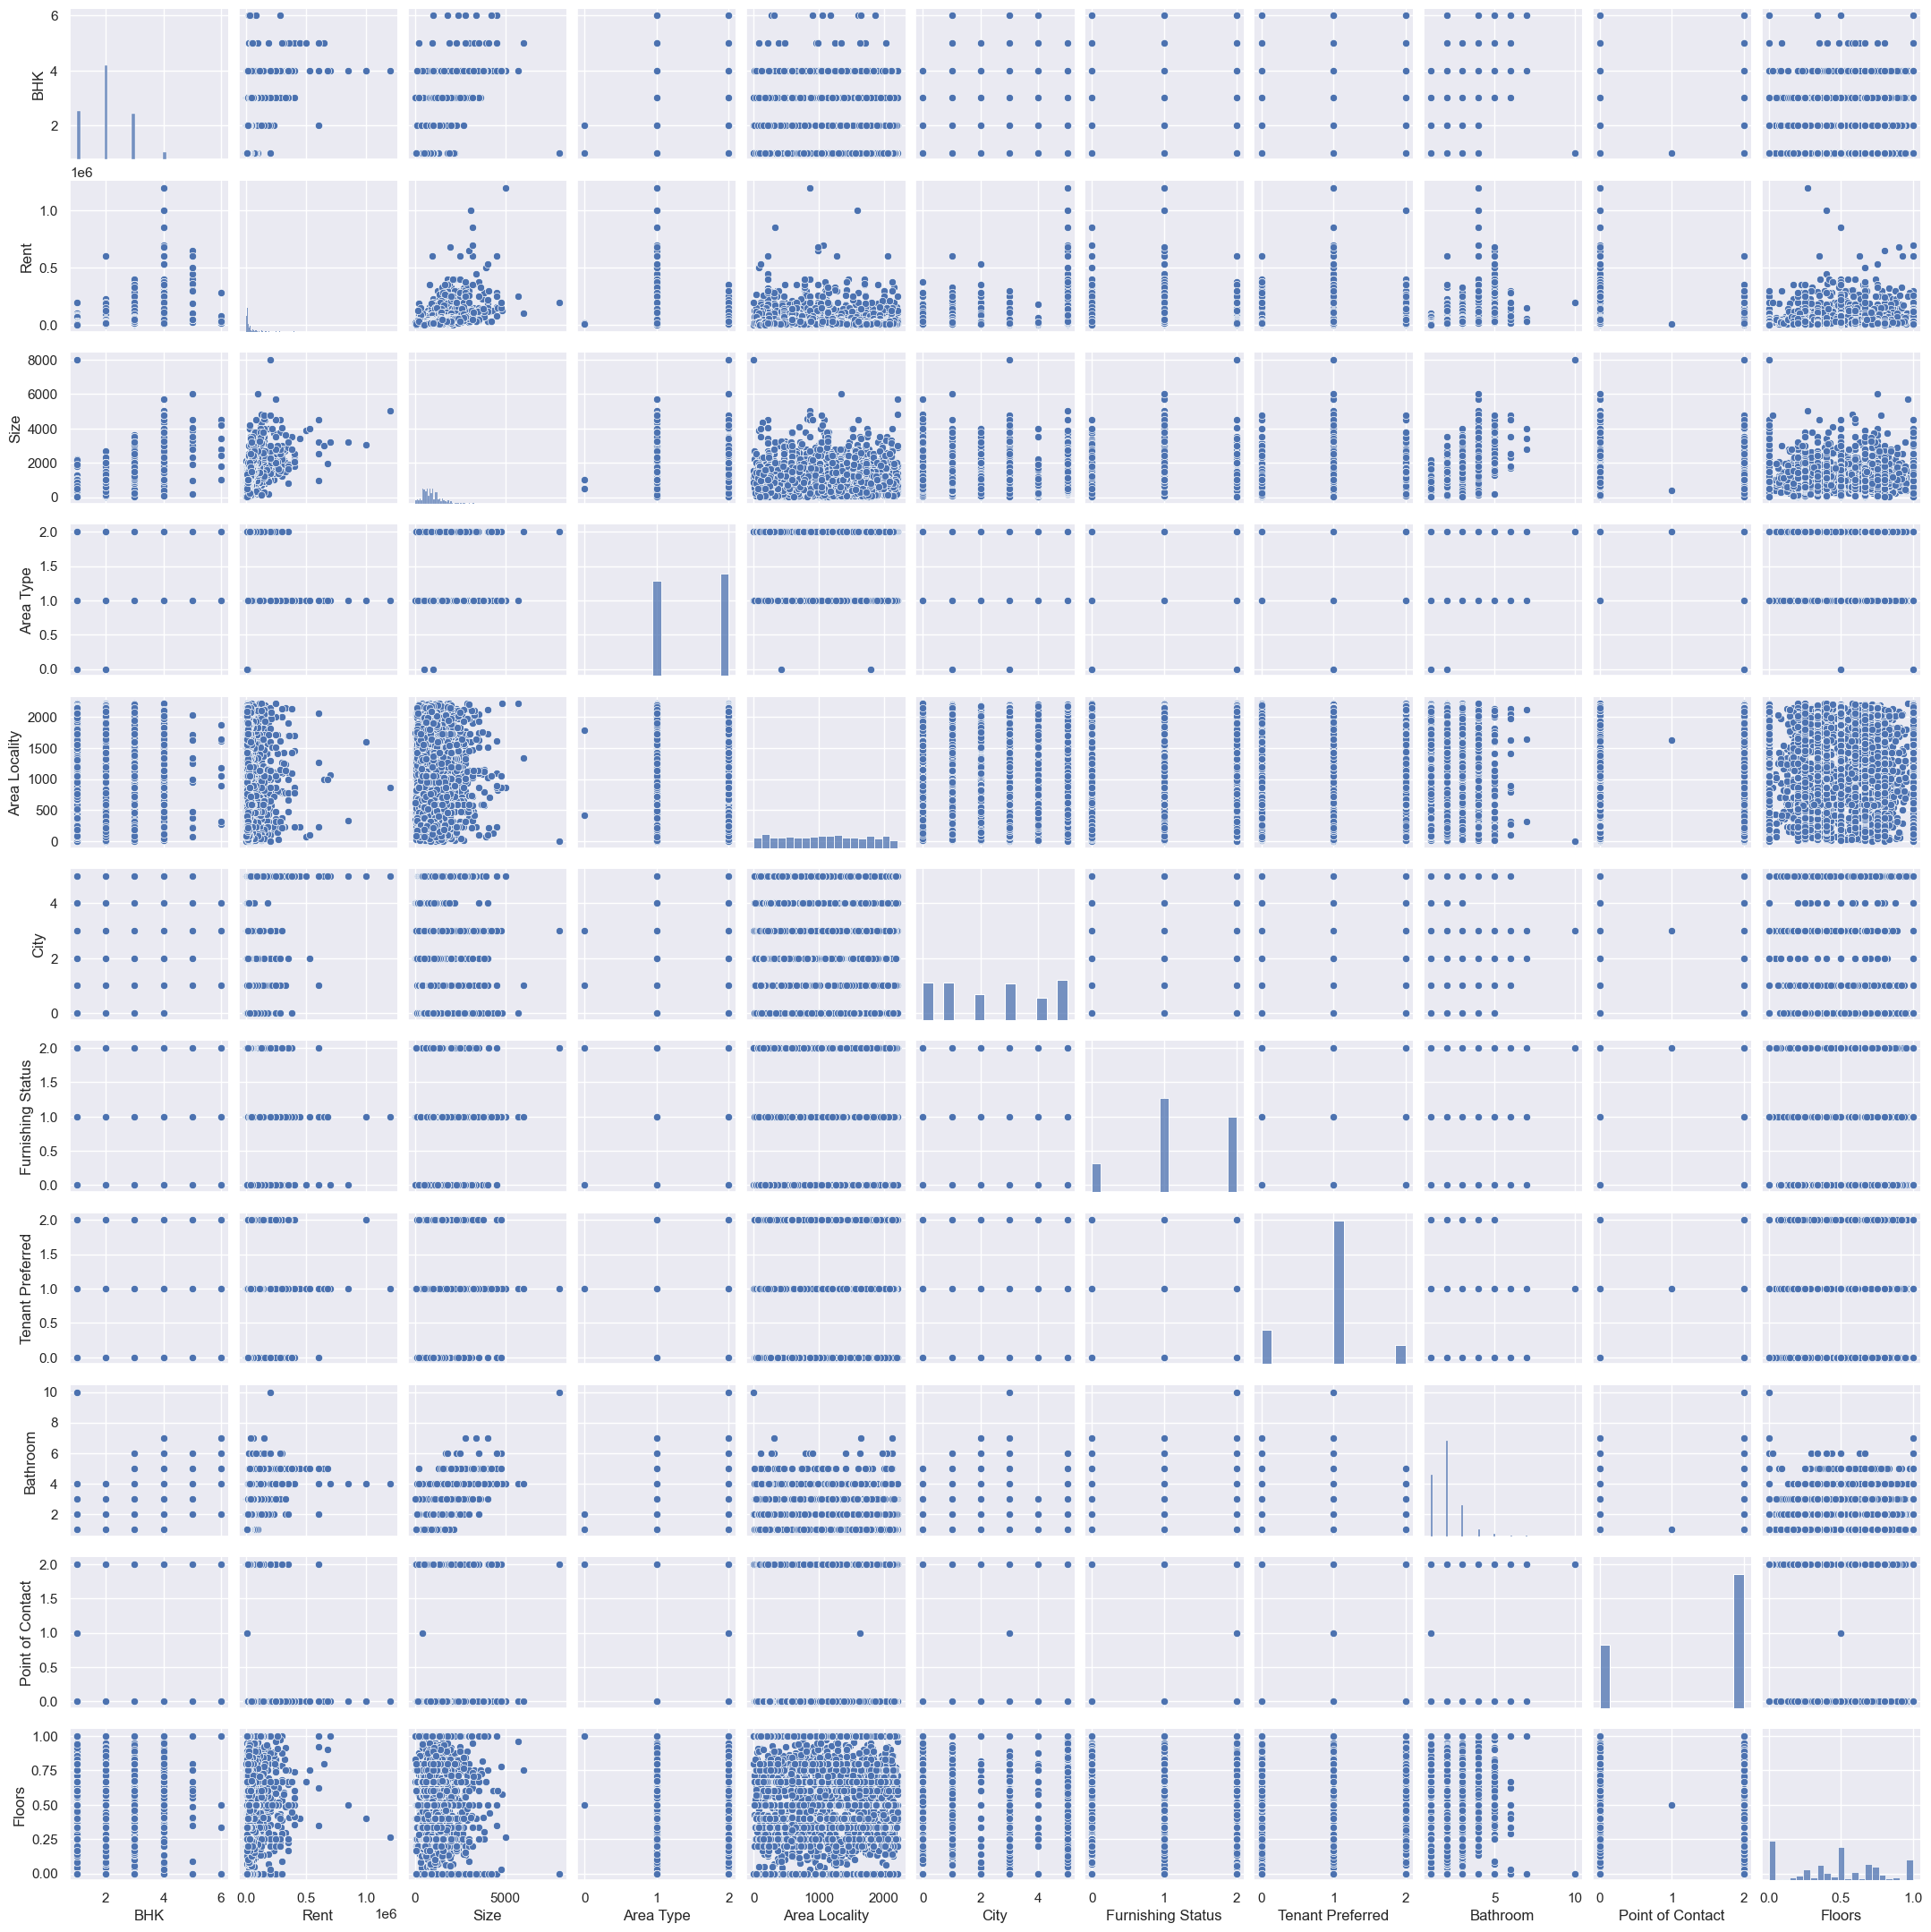

In [33]:
sns.pairplot(df,height=2)
plt.show()

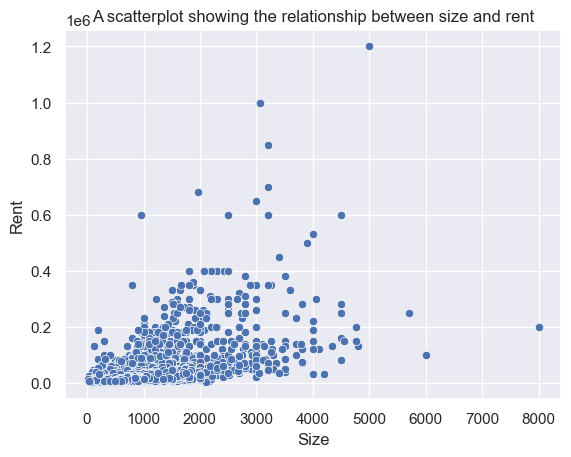

In [34]:
sns.scatterplot(x='Size', y='Rent', data=df)
plt.title("A scatterplot showing the relationship between size and rent")
plt.show()

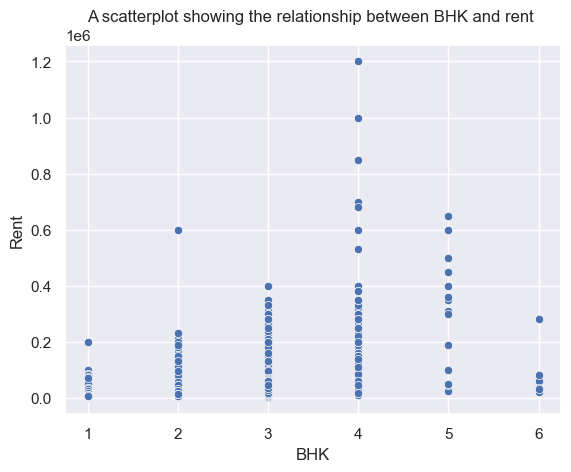

In [35]:
sns.scatterplot(x='BHK', y='Rent', data=df)
plt.title("A scatterplot showing the relationship between BHK and rent ")
plt.show()

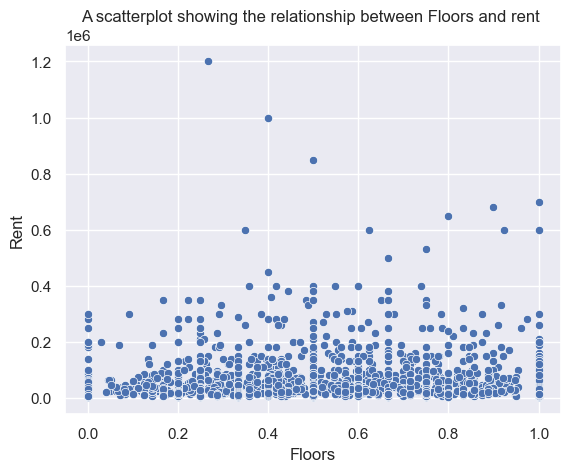

In [36]:
sns.scatterplot(x='Floors', y='Rent', data=df)
plt.title("A scatterplot showing the relationship between Floors and rent ")
plt.show()

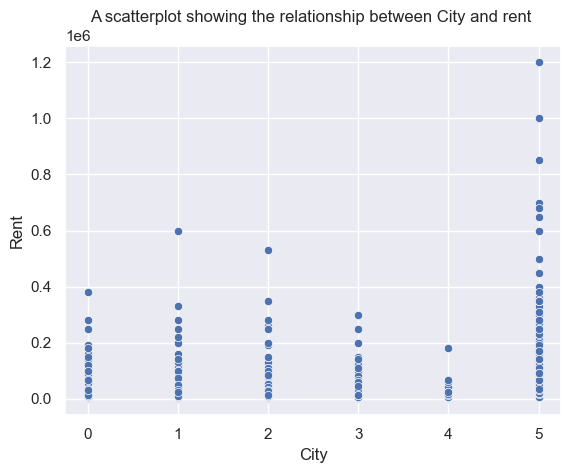

In [37]:
sns.scatterplot(x='City', y='Rent', data=df)
plt.title("A scatterplot showing the relationship between City and rent ")
plt.show()

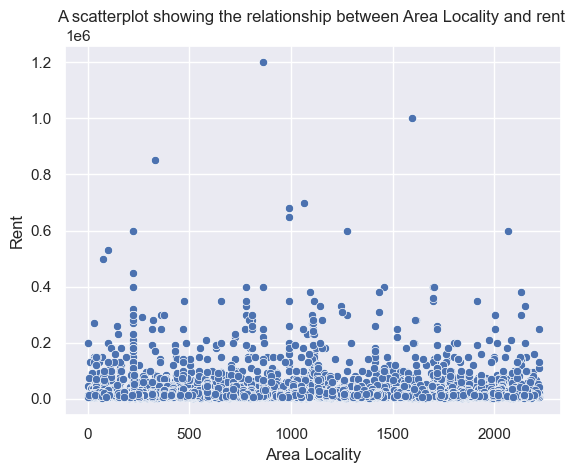

In [38]:
sns.scatterplot(x='Area Locality', y='Rent', data=df)
plt.title("A scatterplot showing the relationship between Area Locality and rent ")
plt.show()

In [39]:
df.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Floors'],
      dtype='object')

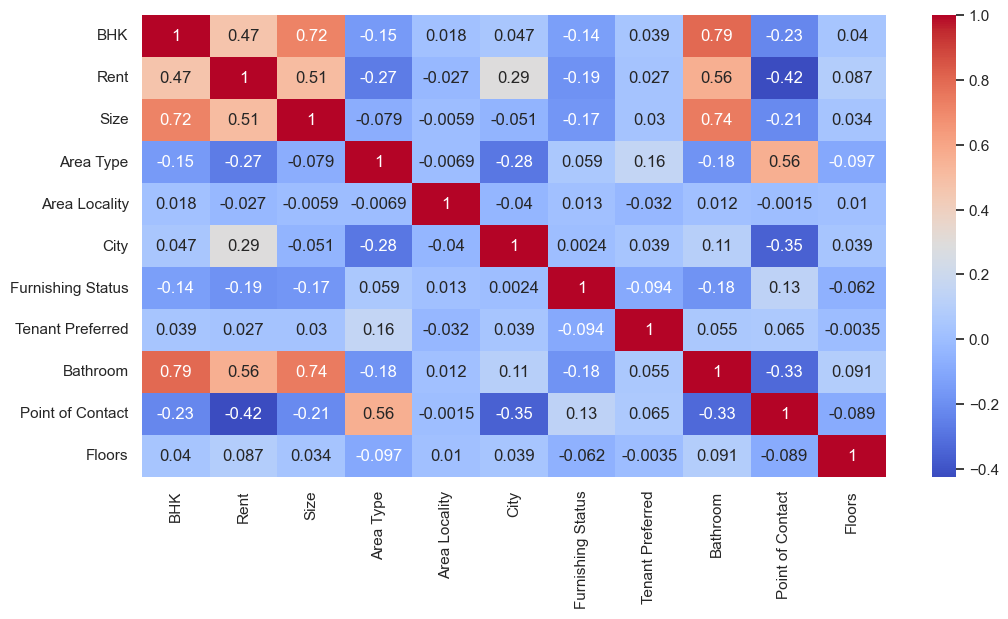

In [40]:
#visualizing the correlation of the features
numeric_data = df.select_dtypes(include=[float, int])
corr = numeric_data.corr()
plt.subplots(figsize=(12, 6))
sns.heatmap(corr, vmax=1, square=False, annot=True, cmap='coolwarm')
plt.show()

In [41]:
df1=df.copy()
df1.head()

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floors
0,2,10000,1100,2,219,4,2,1,2,2,0.000000
1,2,20000,800,2,1515,4,1,1,1,2,0.333333
2,2,17000,1000,2,1746,4,1,1,1,2,0.333333
3,2,10000,800,2,522,4,2,1,1,2,0.500000
4,2,7500,850,1,1876,4,2,0,1,2,0.500000


In [42]:
df1=df1.drop(['BHK','Area Type','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact'], axis=1)

In [43]:
df1.head()

,Rent,Size,Area Locality,City,Floors
0,10000,1100,219,4,0.000000
1,20000,800,1515,4,0.333333
2,17000,1000,1746,4,0.333333
3,10000,800,522,4,0.500000
4,7500,850,1876,4,0.500000


In [44]:
df1.to_csv('output.csv', index=False)

In [44]:
X = df1.drop(['Rent'], axis=1).values
y = df1['Rent'].values

In [45]:
def rmse(ytest, ypred):
  result = np.sqrt(mean_squared_error(ytest, ypred))
  return result

In [46]:
def r2score(model):
  score = model.score(rescaledX_test, y_test)
  return score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Test


In [48]:
from sklearn.ensemble import RandomForestRegressor

# Define the model
model = RandomForestRegressor()

# Define hyperparameters to try
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30]
}

from sklearn.model_selection import GridSearchCV

# Create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters:", grid_search.best_params_)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best parameters: {'max_depth': 10, 'n_estimators': 300}


In [49]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define a larger range for random search
param_dist = {
    'n_estimators': [int(x) for x in range(100, 1100, 100)],
    'max_depth': [int(x) for x in range(10, 110, 10)]
}

# Create the random search object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, 
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Best parameters found
print("Best parameters from random search:", random_search.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters from random search: {'n_estimators': 100, 'max_depth': 80}


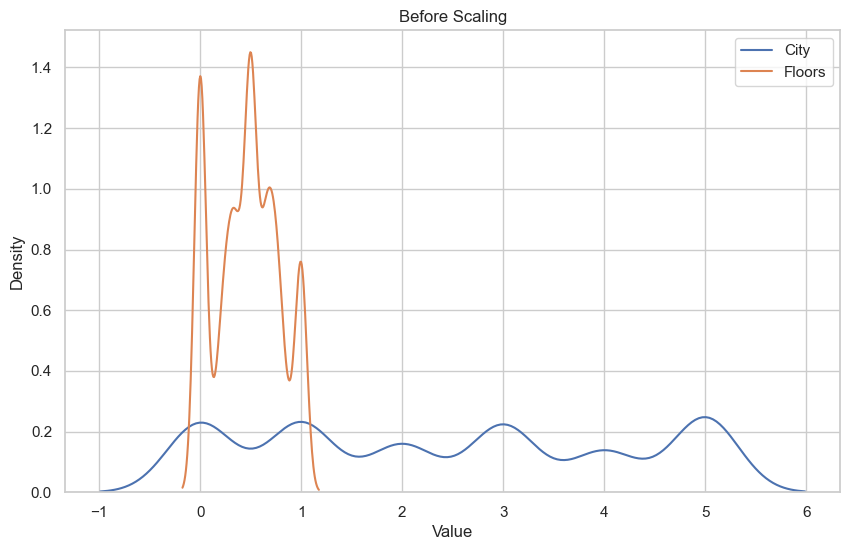

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Set the style for the plot
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Plot KDE for each column
# sns.kdeplot(df1['Size'], label='Size')
# sns.kdeplot(df1['Area Locality'], label='Area Locality')
sns.kdeplot(df1['City'], label='City')
sns.kdeplot(df1['Floors'], label='Floors')

# Add title and labels
plt.title('Before Scaling')
plt.xlabel('Value')
plt.ylabel('Density')

# Add legend
plt.legend()

# Save and show plot
plt.show()


End Test

In [51]:
scaler = StandardScaler()
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

Linear regression.

In [52]:
lr = LinearRegression()
lr.fit(rescaledX_train, y_train)

LinearRegression()

In [53]:
y_pred_lr = lr.predict(rescaledX_test)

In [54]:
r2score(lr)

0.3465115044938245

In [55]:
rmse(y_test, y_pred_lr)

43420.915881151894

Decision Tree

In [56]:
tree = DecisionTreeRegressor(min_samples_split=30, max_depth=10)
tree.fit(rescaledX_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_split=30)

In [57]:
y_pred_tree = tree.predict(rescaledX_test)

In [58]:
r2score(tree)

0.717894794990113

In [59]:
rmse(y_test, y_pred_tree)

28528.934786200694

### Xgboost

In [60]:
xgb = XGBRegressor(max_depth=3, n_jobs=-1)
xgb.fit(rescaledX_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=-1,
             num_parallel_tree=None, random_state=None, ...)

In [61]:
y_pred_xgb = xgb.predict(rescaledX_test)

In [62]:
r2score(xgb)

0.7531899700431082

In [63]:
rmse(y_test, y_pred_xgb)

26684.64374016742

### Gradient Boosting

In [64]:
boost = GradientBoostingRegressor(n_estimators=300, min_samples_split=20)
boost.fit(rescaledX_train, y_train)

GradientBoostingRegressor(min_samples_split=20, n_estimators=300)

In [65]:
y_pred_boost = boost.predict(rescaledX_test)

In [66]:
r2score(boost)

0.7764432935553073

In [67]:
rmse(y_test, y_pred_boost)

25396.49937158867

### Random Forest

In [84]:
forest = RandomForestRegressor(n_estimators=300, max_depth=10, min_samples_split=30, n_jobs=-1, random_state=0)
forest.fit(rescaledX_train, y_train)

RandomForestRegressor(max_depth=10, min_samples_split=30, n_estimators=300,
                      n_jobs=-1, random_state=0)

In [85]:
y_pred_forest = forest.predict(rescaledX_test)

In [86]:
r2score(forest)

0.7442003015192703

In [87]:
rmse(y_test, y_pred_forest)

27166.270502048643

In [88]:
print("Linear Regression: ",r2score(lr),"    ",rmse(y_test, y_pred_lr))
print("Descison Tree: ",r2score(tree),"    ",rmse(y_test, y_pred_tree))
print("XGboost: ",r2score(xgb),"    ",rmse(y_test, y_pred_xgb))
print("Gradient Boosting: ",r2score(boost),"    ",rmse(y_test, y_pred_boost))
print("Random Forest: ",r2score(forest),"    ",rmse(y_test, y_pred_forest))

Linear Regression:  0.3465115044938245      43420.915881151894
Descison Tree:  0.717894794990113      28528.934786200694
XGboost:  0.7531899700431082      26684.64374016742
Gradient Boosting:  0.7764432935553073      25396.49937158867
Random Forest:  0.7442003015192703      27166.270502048643


In [73]:
df1.columns

Index(['Rent', 'Size', 'Area Locality', 'City', 'Floors'], dtype='object')